In [1]:
print('DLLABS')

DLLABS


# 1**
#### Demonstrate use of tensorflow and pytorch by implementing simple code in python

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.8749 - loss: 0.4407
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 17s 7ms/step - accuracy: 0.9627 - loss: 0.1291
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9769 - loss: 0.0780
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 4ms/step - accuracy: 0.9834 - loss: 0.0575
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9877 - loss: 0.0414
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9692 - loss: 0.1027
Test accuracy: 0.9739


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


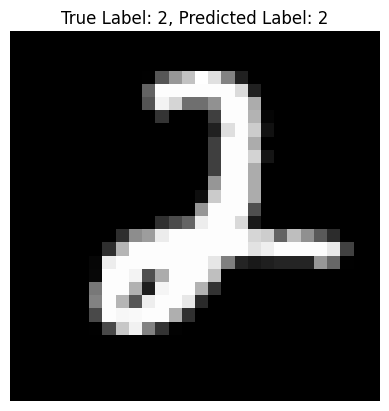

In [17]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist

# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0  # Normalize the images

# Create the model
model = models.Sequential([
    layers.Flatten(input_shape=(28, 28)),  # Flatten the input
    layers.Dense(128, activation='relu'),   # Hidden layer with ReLU activation
    layers.Dense(10, activation='softmax')   # Output layer with softmax activation
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
model.fit(x_train, y_train, epochs=5)

# Evaluate the model
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f'Test accuracy: {test_acc:.4f}')

# Make a prediction on a random test image
random_index = np.random.randint(0, x_test.shape[0])
test_image = x_test[random_index]
test_label = y_test[random_index]

# Predict the class
predicted_label = np.argmax(model.predict(np.expand_dims(test_image, axis=0)))

# Visualize the test image and prediction
plt.imshow(test_image, cmap='gray')
plt.title(f'True Label: {test_label}, Predicted Label: {predicted_label}')
plt.axis('off')
plt.show()


Test accuracy: 0.9644


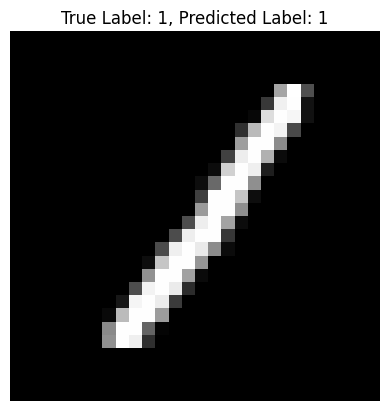

In [18]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
import matplotlib.pyplot as plt
import numpy as np

# Transform and load the MNIST dataset
transform = transforms.Compose([transforms.ToTensor()])
train_dataset = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
test_dataset = datasets.MNIST(root='./data', train=False, download=True, transform=transform)

train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=64, shuffle=True)
test_loader = torch.utils.data.DataLoader(dataset=test_dataset, batch_size=64, shuffle=False)

# Define the model
class SimpleNN(nn.Module):
    def __init__(self):
        super(SimpleNN, self).__init__()
        self.flatten = nn.Flatten()
        self.fc1 = nn.Linear(28 * 28, 128)  # Input layer
        self.fc2 = nn.Linear(128, 10)        # Output layer

    def forward(self, x):
        x = self.flatten(x)
        x = torch.relu(self.fc1(x))          # ReLU activation
        x = torch.softmax(self.fc2(x), dim=1) # Softmax activation
        return x

# Create the model, define the loss function and optimizer
model = SimpleNN()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training the model
for epoch in range(5):  # Train for 5 epochs
    for images, labels in train_loader:
        optimizer.zero_grad()        # Zero the gradients
        outputs = model(images)      # Forward pass
        loss = criterion(outputs, labels)  # Compute the loss
        loss.backward()              # Backward pass
        optimizer.step()             # Update the weights

# Evaluate the model
model.eval()  # Set the model to evaluation mode
correct = 0
total = 0

with torch.no_grad():
    for images, labels in test_loader:
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)  # Get the index of the max log-probability
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Test accuracy: {correct / total:.4f}')

# Make a prediction on a random test image
random_index = np.random.randint(0, len(test_dataset))
test_image, test_label = test_dataset[random_index]

# Predict the class
model.eval()  # Set to evaluation mode
with torch.no_grad():
    output = model(test_image.unsqueeze(0))  # Add batch dimension
    predicted_label = torch.argmax(output).item()

# Visualize the test image and prediction
plt.imshow(test_image.squeeze(), cmap='gray')
plt.title(f'True Label: {test_label}, Predicted Label: {predicted_label}')
plt.axis('off')
plt.show()


# 2
#### Implement Feedforward neural networks with Keras and TensorFlow MNIST Digit dataset

Shape of X_train (60000, 28, 28)
Shape of y_train (60000,)
Shape of x_test  (10000, 28, 28)
Shape of y_test  (10000,)
(60000, 28, 28) (10000, 28, 28)
Epoch 1/10
2000/2000 [==============================] - 5s 2ms/step - loss: 0.6921 - accuracy: 0.8095 - val_loss: 0.3336 - val_accuracy: 0.9043
Epoch 2/10
2000/2000 [==============================] - 4s 2ms/step - loss: 0.3036 - accuracy: 0.9121 - val_loss: 0.2619 - val_accuracy: 0.9256
Epoch 3/10
2000/2000 [==============================] - 4s 2ms/step - loss: 0.2519 - accuracy: 0.9269 - val_loss: 0.2262 - val_accuracy: 0.9353
Epoch 4/10
2000/2000 [==============================] - 4s 2ms/step - loss: 0.2192 - accuracy: 0.9361 - val_loss: 0.2054 - val_accuracy: 0.9405
Epoch 5/10
2000/2000 [==============================] - 4s 2ms/step - loss: 0.1958 - accuracy: 0.9429 - val_loss: 0.1866 - val_accuracy: 0.9474
Epoch 6/10
2000/2000 [==============================] - 4s 2ms/step - loss: 0.1787 - accuracy: 0.9481 - val_loss: 0.1729 - val_acc

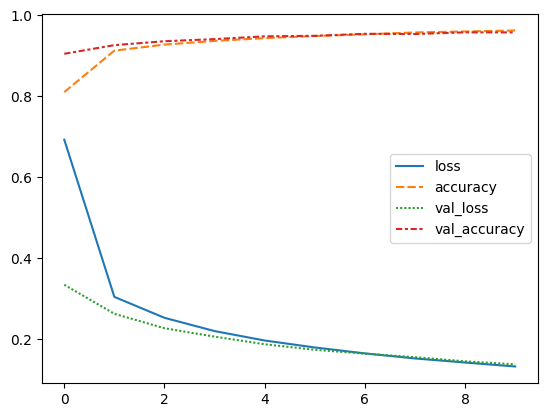

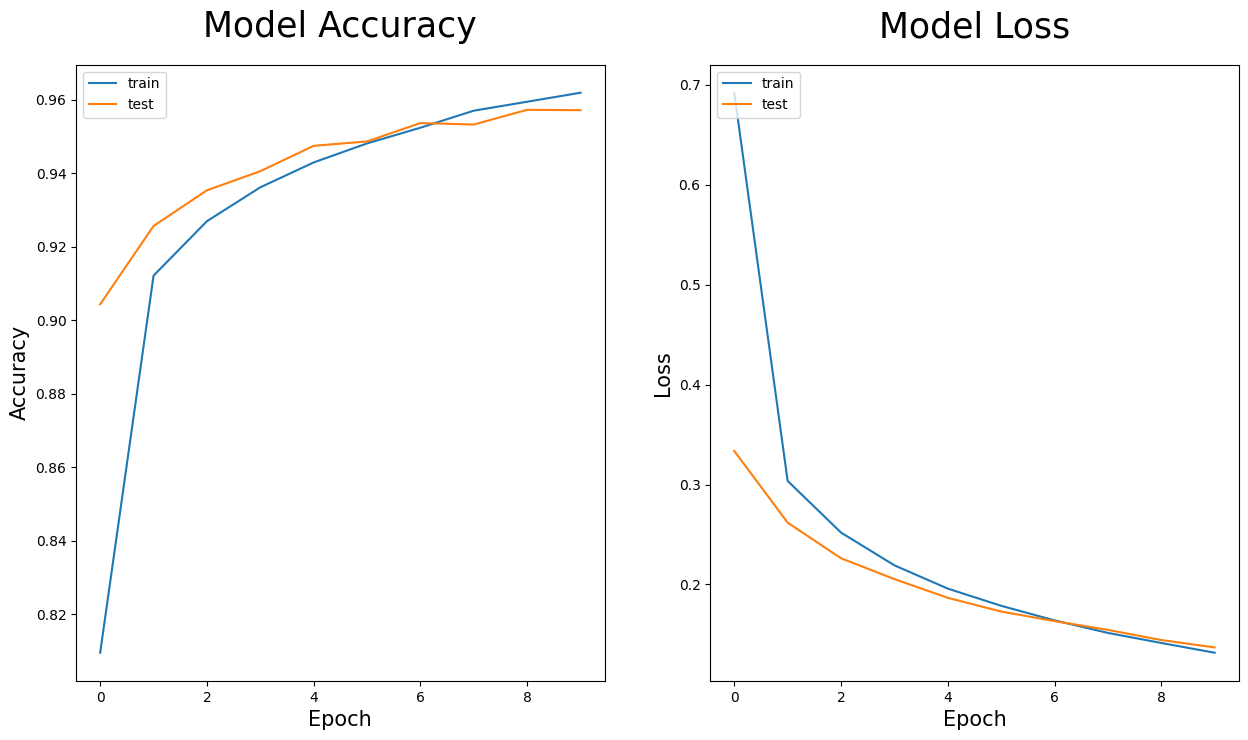

313/313 [==============================] - 0s 2ms/step - loss: 0.1370 - accuracy: 0.9571


313/313 [==============================] - 0s 1ms/step


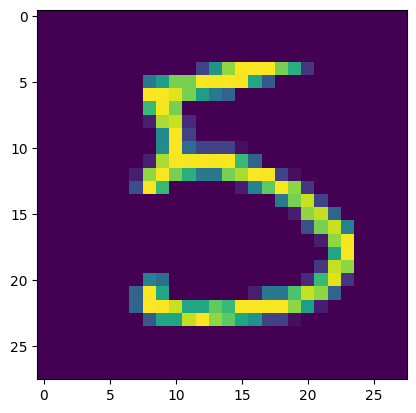

5


In [16]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

#shape of numpy arrays
print(f"Shape of X_train {x_train.shape}")
print(f"Shape of y_train {y_train.shape}")
print(f"Shape of x_test  {x_test.shape}")
print(f"Shape of y_test  {y_test.shape}")
# x_train( 60k images of 28*28 dimention) Pixel values range from 0 to 255.
# y_train: digit labels (integers in range 0-9)

#scaling the values
x_train = x_train/255
x_test = x_test/255
# 0/255 = 255
#255/255 = 1 maximum value

print(x_train.shape, x_test.shape)

model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(50,activation='relu',name='L1'),
    keras.layers.Dense(50,activation='relu',name='L2'),
    keras.layers.Dense(10,activation='softmax',name='L3')
])

model.compile(optimizer="sgd",loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

# Training the model
history = model.fit(x_train, y_train,
              batch_size=30,
              epochs=10,
              validation_data=(x_test, y_test),
              shuffle=True)

import seaborn as sns
sns.lineplot(model.history.history)

# Plotting the Model Accuracy & Model Loss vs Epochs
plt.figure(figsize=[15,8])

# summarize history for accuracy
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy', size=25, pad=20)
plt.ylabel('Accuracy', size=15)
plt.xlabel('Epoch', size=15)
plt.legend(['train', 'test'], loc='upper left')


# summarize history for loss
plt.subplot(1,2,2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss', size=25, pad=20)
plt.ylabel('Loss', size=15)
plt.xlabel('Epoch', size=15)
plt.legend(['train', 'test'], loc='upper left')
plt.show()

loss,accuracy = model.evaluate(x_test,y_test)

predicted_value=model.predict(x_test)
plt.imshow(x_test[15])
plt.show()
print(np.argmax(predicted_value[15], axis=0))

# 3
##### Implement Feedforward neural networks with Keras and TensorFlow CIFAR dataset

In [18]:
# Import necessary libraries
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical

# 1. Load the CIFAR-10 dataset
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

# 2. Preprocess the data
# Normalize the images from range [0, 255] to [0, 1]
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

# Convert class labels to one-hot encoding
y_train = to_categorical(y_train, 10)  # 10 classes in CIFAR-10
y_test = to_categorical(y_test, 10)

# 3. Define the feedforward neural network
model = Sequential()

# Flatten the 32x32x3 images into a 1D vector of 3072 (32*32*3)
model.add(Flatten(input_shape=(32, 32, 3)))

# Add a fully connected layer with 512 neurons and ReLU activation
model.add(Dense(512, activation='relu'))

# Add another fully connected layer with 256 neurons and ReLU activation
model.add(Dense(256, activation='relu'))

# Add another fully connected layer with 128 neurons and ReLU activation
model.add(Dense(128, activation='relu'))

# Output layer with 10 neurons (for each class) and softmax activation
model.add(Dense(10, activation='softmax'))

# 4. Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# 5. Train the model
model.fit(X_train, y_train, epochs=5, batch_size=64, validation_split=0.2)

# 6. Evaluate the model on the test data
test_loss, test_acc = model.evaluate(X_test, y_test)

print(f'Test accuracy: {test_acc}')

import matplotlib.pyplot as plt
cifars = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']
n=5
plt.imshow(X_test[n])
plt.show()
predicted_value = model.predict(X_test)
plt.imshow(X_test[n])
plt.show()
pred = predicted_value[n].argmax()
print('Prediction:',cifars[pred])

Epoch 1/5
625/625 [==============================] - 6s 9ms/step - loss: 1.8963 - accuracy: 0.3115 - val_loss: 1.7597 - val_accuracy: 0.3683
Epoch 2/5
625/625 [==============================] - 5s 9ms/step - loss: 1.7048 - accuracy: 0.3865 - val_loss: 1.7585 - val_accuracy: 0.3767
Epoch 3/5
625/625 [==============================] - 5s 9ms/step - loss: 1.6279 - accuracy: 0.4165 - val_loss: 1.6305 - val_accuracy: 0.4120
Epoch 4/5
625/625 [==============================] - 5s 9ms/step - loss: 1.5675 - accuracy: 0.4399 - val_loss: 1.6011 - val_accuracy: 0.4355
Epoch 5/5
313/313 [==============================] - 1s 2ms/step - loss: 1.5249 - accuracy: 0.4540
Test accuracy: 0.45399999618530273


© atO2

# 4
#### Build image classification model using CNN on fashion MNIST dataset.

In [22]:
# Import necessary libraries
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical

# 1. Load the Fashion MNIST dataset
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

# 2. Preprocess the data
# Reshape data to include a single channel (grayscale)
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype('float32')
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1).astype('float32')

# Normalize pixel values from [0, 255] to [0, 1]
X_train = X_train / 255.0
X_test = X_test / 255.0

# Convert the labels to one-hot encoded format
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# 3. Define the CNN model
model = Sequential()

# Add a Conv2D layer with 32 filters, 3x3 kernel, ReLU activation, and input shape of 28x28x1
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))

# Add a MaxPooling2D layer with a pool size of 2x2
model.add(MaxPooling2D(pool_size=(2, 2)))

# Add another Conv2D layer with 64 filters and 3x3 kernel
model.add(Conv2D(64, (3, 3), activation='relu'))

# Add another MaxPooling2D layer
model.add(MaxPooling2D(pool_size=(2, 2)))

# Add a dropout layer to prevent overfitting
model.add(Dropout(0.25))

# Flatten the feature maps into a 1D vector
model.add(Flatten())

# Add a fully connected layer with 128 neurons
model.add(Dense(128, activation='relu'))

# Add a dropout layer to prevent overfitting
model.add(Dropout(0.5))

# Output layer with 10 neurons (for each class) and softmax activation
model.add(Dense(10, activation='softmax'))

# 4. Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# 5. Train the model
model.fit(X_train, y_train, epochs=10, batch_size=64, validation_split=0.2)

# 6. Evaluate the model on the test data
test_loss, test_acc = model.evaluate(X_test, y_test)

print(f'Test accuracy: {test_acc}')

import matplotlib.pyplot as plt
fashion = ['tshirt/top','trouser','pullover','dress','coat','sandal','shirt','sneaker','bag','ankle boot']
n=5
plt.imshow(X_test[n])
plt.show()
predicted_value = model.predict(X_test)
plt.imshow(X_test[n])
plt.show()
pred = predicted_value[n].argmax()
print('Prediction:',fashion[pred])

4422102/4422102 [==============================] - 0s 0us/step
Epoch 1/10
750/750 [==============================] - 8s 10ms/step - loss: 0.6277 - accuracy: 0.7700 - val_loss: 0.4055 - val_accuracy: 0.8520
Epoch 2/10
750/750 [==============================] - 7s 9ms/step - loss: 0.4249 - accuracy: 0.8451 - val_loss: 0.3333 - val_accuracy: 0.8786
Epoch 3/10
750/750 [==============================] - 7s 9ms/step - loss: 0.3699 - accuracy: 0.8650 - val_loss: 0.3034 - val_accuracy: 0.8878
Epoch 4/10
750/750 [==============================] - 7s 9ms/step - loss: 0.3343 - accuracy: 0.8795 - val_loss: 0.2935 - val_accuracy: 0.8899
Epoch 5/10
750/750 [==============================] - 7s 9ms/step - loss: 0.3096 - accuracy: 0.8874 - val_loss: 0.2771 - val_accuracy: 0.8984
Epoch 6/10
750/750 [==============================] - 7s 9ms/step - loss: 0.2923 - accuracy: 0.8944 - val_loss: 0.2582 - val_accuracy: 0.9062
Epoch 7/10
750/750 [==============================] - 7s 9ms/step - loss: 0.2788 - a

# 5
#### Build image classification model using CNN on pneumonia X RAY IMAGE dataset.

Found 2040 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 484 images belonging to 2 classes.
Epoch 1/10
64/64 [==============================] - 87s 1s/step - loss: 0.4543 - accuracy: 0.8500 - val_loss: 0.8232 - val_accuracy: 0.5000
Epoch 2/10
64/64 [==============================] - 30s 465ms/step - loss: 0.3693 - accuracy: 0.8618 - val_loss: 0.8275 - val_accuracy: 0.5000
Epoch 3/10
64/64 [==============================] - 30s 468ms/step - loss: 0.2946 - accuracy: 0.8627 - val_loss: 1.0370 - val_accuracy: 0.6875
Epoch 4/10
64/64 [==============================] - 29s 458ms/step - loss: 0.2528 - accuracy: 0.8760 - val_loss: 1.1283 - val_accuracy: 0.5625
Epoch 5/10
64/64 [==============================] - 30s 462ms/step - loss: 0.2582 - accuracy: 0.8765 - val_loss: 0.5843 - val_accuracy: 0.8125
Epoch 6/10
64/64 [==============================] - 30s 465ms/step - loss: 0.2212 - accuracy: 0.8873 - val_loss: 0.6542 - val_accuracy: 0.7500
Epoch 7/10
64/64 [====

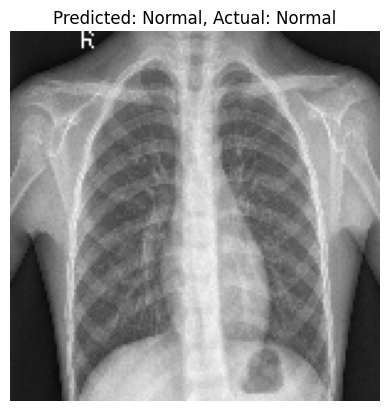

In [25]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np
import os

# Set paths for train, validation, and test directories
train_dir = '/content/drive/MyDrive/BE STUDY/DL/FINAL_DATASEt/Deep Learning Datasets/Pneumonia_X_Ray/train'
val_dir = '/content/drive/MyDrive/BE STUDY/DL/FINAL_DATASEt/Deep Learning Datasets/Pneumonia_X_Ray/val'
test_dir = '/content/drive/MyDrive/BE STUDY/DL/FINAL_DATASEt/Deep Learning Datasets/Pneumonia_X_Ray/test'

# Image data generators with augmentation for the training set
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True
)

val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# Load images in batches
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
)

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(150, 150),
    batch_size=1,
    class_mode='binary',
    shuffle=False
)

# Build CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=len(train_generator),
    epochs=10,
    validation_data=val_generator,
    validation_steps=len(val_generator)
)

# Evaluate the model on the test set
loss, accuracy = model.evaluate(test_generator, steps=len(test_generator))
print(f"Test Loss: {loss:.4f}, Test Accuracy: {accuracy:.4f}")

# Test prediction and display an example
sample_image, sample_label = test_generator.next()  # get one batch
prediction = model.predict(sample_image)
predicted_class = "Pneumonia" if prediction[0][0] > 0.5 else "Normal"
actual_class = "Pneumonia" if sample_label[0] == 1 else "Normal"

# Display the image with prediction and actual label
plt.imshow(sample_image[0])
plt.title(f"Predicted: {predicted_class}, Actual: {actual_class}")
plt.axis('off')
plt.show()


# 6
#### Build image classification model using CNN on FOOD dataset.

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Input
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np

# Set paths for train and test directories
test_dir = r"D:\STUDY\I2IT\BE\Academic\DL\Practical\Dataset\food_dataset\evaluation"
train_dir = r"D:\STUDY\I2IT\BE\Academic\DL\Practical\Dataset\food_dataset\training"

# Image data generators with augmentation for the training set
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True
)

test_datagen = ImageDataGenerator(rescale=1./255)

# Load images in batches
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical',
    shuffle=False
)

# Build CNN model
model = Sequential([
    Input(shape=(150, 150, 3)),
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(4, activation='softmax')  # 4 classes: bread, dairy, dessert, fried
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(
    train_generator,
    epochs=10,
    validation_data=test_generator
)

# Evaluate the model on the test set
loss, accuracy = model.evaluate(test_generator)
print(f"Test Loss: {loss:.4f}, Test Accuracy: {accuracy:.4f}")

# Test prediction and display an example
class_labels = list(train_generator.class_indices.keys())
sample_image, sample_label = next(test_generator)  # get one batch using next()
prediction = model.predict(sample_image)
predicted_class = class_labels[np.argmax(prediction[0])]
actual_class = class_labels[np.argmax(sample_label[0])]

# Display the image with prediction and actual label
plt.imshow(sample_image[0])
plt.title(f"Predicted: {predicted_class}, Actual: {actual_class}")
plt.axis('off')
plt.show()

# 7
#### Build Brain tumor classification model with CNN

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Input
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np

# Set paths for training and testing directories
train_dir = r"D:\STUDY\I2IT\BE\Academic\DL\Practical\Dataset\brain tumour\Training"
test_dir = r"D:\STUDY\I2IT\BE\Academic\DL\Practical\Dataset\brain tumour\Testing"

# Image data generators with augmentation for the training set
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True
)

test_datagen = ImageDataGenerator(rescale=1./255)

# Load images in batches
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),  # Resize images
    batch_size=32,
    class_mode='categorical'  # Use 'binary' if only two classes
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(150, 150),
    batch_size=1,
    class_mode='categorical',  # Use 'binary' if only two classes
    shuffle=False
)

# Build CNN model
model = Sequential([
    Input(shape=(150, 150, 3)),
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(len(train_generator.class_indices), activation='softmax')  # Change based on classes
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(
    train_generator,
    epochs=10,
    validation_data=test_generator
)

# Evaluate the model on the test set
loss, accuracy = model.evaluate(test_generator)
print(f"Test Loss: {loss:.4f}, Test Accuracy: {accuracy:.4f}")

# Test prediction and display an example
class_labels = list(train_generator.class_indices.keys())
sample_image, sample_label = next(test_generator)  # Use next() to get a batch
prediction = model.predict(sample_image)
predicted_class = class_labels[np.argmax(prediction[0])]
actual_class = class_labels[np.argmax(sample_label[0])]

# Display the image with prediction and actual label
plt.imshow(sample_image[0])
plt.title(f"Predicted: {predicted_class}, Actual: {actual_class}")
plt.axis('off')
plt.show()

# 8**
#### Build Recurrent Neural Network by using the numpy library

In [5]:
import numpy as np

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def dsigmoid(x):
    return x * (1 - x)

def RNN(X, W_xh, W_hh, W_hy, b_h, b_y):
    # X: Input sequence (batch_size, seq_len, input_dim)
    # W_xh: Weight matrix from input to hidden layer (input_dim, hidden_dim)
    # W_hh: Recurrent weight matrix (hidden_dim, hidden_dim)
    # W_hy: Weight matrix from hidden layer to output layer (hidden_dim, output_dim)
    # b_h: Bias for the hidden layer (hidden_dim,)
    # b_y: Bias for the output layer (output_dim,)

    hidden_state = np.zeros((X.shape[0], X.shape[1], W_hh.shape[0]))
    output = np.zeros((X.shape[0], X.shape[1], W_hy.shape[1]))

    for t in range(X.shape[1]):
        hidden_state[:, t, :] = sigmoid(np.dot(X[:, t, :], W_xh) + np.dot(hidden_state[:, t-1, :], W_hh) + b_h)
        output[:, t, :] = sigmoid(np.dot(hidden_state[:, t, :], W_hy) + b_y)

    return output

# Example usage:
input_dim = 10
hidden_dim = 5
output_dim = 2
seq_len = 4
batch_size = 2

X = np.random.rand(batch_size, seq_len, input_dim)
W_xh = np.random.rand(input_dim, hidden_dim)
W_hh = np.random.rand(hidden_dim, hidden_dim)
W_hy = np.random.rand(hidden_dim, output_dim)
b_h = np.zeros((hidden_dim,))
b_y = np.zeros((output_dim,))

output = RNN(X, W_xh, W_hh, W_hy, b_h, b_y)
print(output)

[[[0.82983023 0.8942863 ]
  [0.83847384 0.90220662]
  [0.83786352 0.90138343]
  [0.83962492 0.9030366 ]]

 [[0.80411135 0.87166779]
  [0.83493826 0.89881226]
  [0.83727703 0.90135367]
  [0.8396938  0.903157  ]]]


# 9
#### Implement simple autoencoder to reconstruct MNIST digits. Add sparsity constraint on the encoded representations

11490434/11490434 [==============================] - 0s 0us/step
Epoch 1/50
235/235 [==============================] - 2s 6ms/step - loss: 0.2444 - val_loss: 0.1628
Epoch 2/50
235/235 [==============================] - 1s 5ms/step - loss: 0.1451 - val_loss: 0.1287
Epoch 3/50
235/235 [==============================] - 1s 5ms/step - loss: 0.1200 - val_loss: 0.1098
Epoch 4/50
235/235 [==============================] - 1s 5ms/step - loss: 0.1053 - val_loss: 0.0990
Epoch 5/50
235/235 [==============================] - 1s 6ms/step - loss: 0.0964 - val_loss: 0.0918
Epoch 6/50
235/235 [==============================] - 1s 6ms/step - loss: 0.0903 - val_loss: 0.0870
Epoch 7/50
235/235 [==============================] - 1s 6ms/step - loss: 0.0862 - val_loss: 0.0837
Epoch 8/50
235/235 [==============================] - 1s 6ms/step - loss: 0.0834 - val_loss: 0.0815
Epoch 9/50
235/235 [==============================] - 1s 6ms/step - loss: 0.0816 - val_loss: 0.0802
Epoch 10/50
235/235 [==============

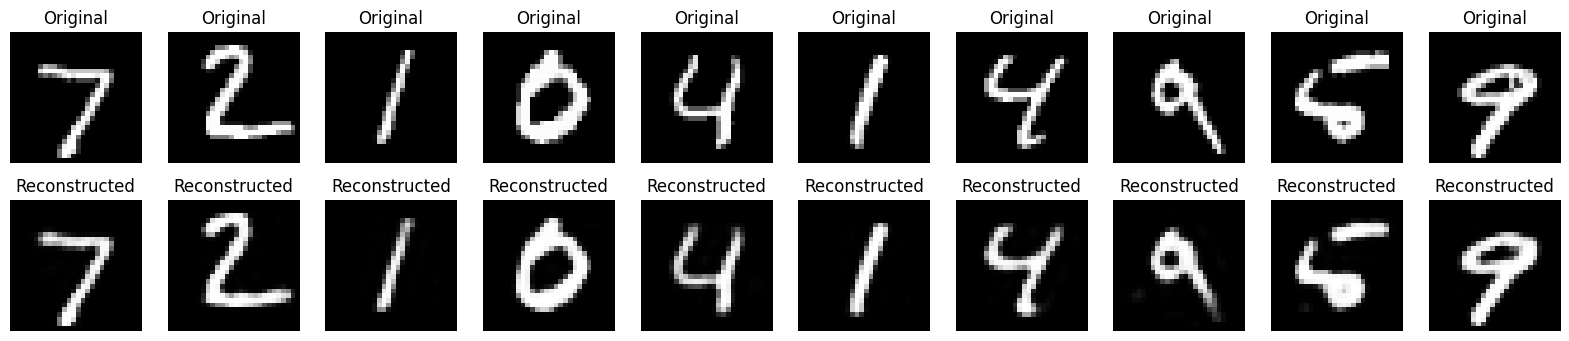

In [7]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model
from tensorflow.keras import regularizers
import matplotlib.pyplot as plt

# Load MNIST dataset
(x_train, _), (x_test, _) = tf.keras.datasets.mnist.load_data()
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

# Parameters
input_dim = 784  # 28x28 images flattened
encoding_dim = 64  # Size of encoding

# Input layer
input_img = Input(shape=(input_dim,))

# Encoded representation with sparsity constraint
encoded = Dense(encoding_dim, activation='relu',
                activity_regularizer=regularizers.l1(1e-5))(input_img)

# Decoded representation
decoded = Dense(input_dim, activation='sigmoid')(encoded)

# Autoencoder model
autoencoder = Model(input_img, decoded)

# Encoder model
encoder = Model(input_img, encoded)

# Compile model
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

# Train autoencoder
history = autoencoder.fit(x_train, x_train,
                          epochs=50,
                          batch_size=256,
                          shuffle=True,
                          validation_data=(x_test, x_test))

# Predict and display some test images
encoded_imgs = encoder.predict(x_test)
decoded_imgs = autoencoder.predict(x_test)

# Plotting original and reconstructed images
n = 10  # Number of test images to display
plt.figure(figsize=(20, 4))
for i in range(n):
    # Display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
    plt.title("Original")
    plt.axis("off")

    # Display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28), cmap='gray')
    plt.title("Reconstructed")
    plt.axis("off")

plt.show()


# 10
#### Use Autoencoder to implement anomaly detection on credit card dataset

In [ ]:
import tensorflow as tf
import pandas as pd
import numpy as np

path = "D:\STUDY\I2IT\BE\Academic\DL\Practical\Dataset\Credit Card Dataset-20241102T133506Z-001\Credit Card Dataset\creditcard.csv"
df = pd.read_csv(path)

df = df.drop(['Time','Class'], axis=1)
df

# Preprocess the data
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

x_train, x_test = train_test_split(df, test_size=0.2)

from keras.models import Model, Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras import layers, models

encoder = tf.keras.models.Sequential([
    layers.Input(shape=(x_train.shape[1],)),
    layers.Dense(64, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(20, activation='relu')
])

decoder = tf.keras.models.Sequential([
    layers.Input(shape=(20,)),
    layers.Dense(64, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(x_train.shape[1], activation='linear')  # Use linear activation for reconstruction
])

model = tf.keras.models.Sequential([
    encoder,
    decoder
])

model.compile(optimizer='adam', loss ='mean_squared_error')

history = model.fit(
    x_train,
    x_train,
    validation_data=(x_test,x_test),
    epochs=5,
    batch_size = 100,
    shuffle=True
)

import seaborn as sns
sns.lineplot(model.history.history)

predictions = model.predict(x_test)
mse = np.mean(np.power(x_test - predictions, 2), axis=1)

threshold = np.percentile(mse, 95)  # Adjust the percentile as needed
print(threshold)
anomalies = mse > threshold

# Calculate the number of anomalies
num_anomalies = np.sum(anomalies)
print(f"Number of Anomalies: {num_anomalies}")

#Plot the anomalies
import matplotlib.pyplot as plt
# plt.figure(figsize=(12, 6))
plt.plot(mse, marker='o', linestyle='', markersize=3, label='MSE', )
plt.axhline(threshold, color='r', linestyle='--', label='Anomaly Threshold')
plt.xlabel('Sample Index')
plt.ylabel('MSE')
plt.title('Anomaly Detection Results')
plt.legend()
plt.show()

plt.figure(figsize=(12, 6))
plt.plot(x_test.iloc[0], label='Original ECG')
plt.plot(predictions[0], label='Reconstructed ECG')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.legend()
plt.title('Normal ECG')
plt.show()

import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

plt.figure(figsize = (6, 4.75))
sns.heatmap(confusion_matrix(anomalies, anomalies), annot = True, annot_kws = {"size": 16}, fmt = 'd')

plt.xlabel("Predicted label", fontsize = 14)
plt.ylabel("True label", fontsize = 14)
plt.title("Confusion Matrix", fontsize = 14)
plt.grid(False)
plt.show()

# 11
#### Implement the concept of image denoising using autoencoders on MNIST data set

Epoch 1/50
235/235 [==============================] - 2s 8ms/step - loss: 0.2598 - val_loss: 0.1939
Epoch 2/50
235/235 [==============================] - 1s 5ms/step - loss: 0.1764 - val_loss: 0.1617
Epoch 3/50
235/235 [==============================] - 1s 6ms/step - loss: 0.1548 - val_loss: 0.1460
Epoch 4/50
235/235 [==============================] - 1s 5ms/step - loss: 0.1417 - val_loss: 0.1354
Epoch 5/50
235/235 [==============================] - 1s 6ms/step - loss: 0.1325 - val_loss: 0.1282
Epoch 6/50
235/235 [==============================] - 1s 6ms/step - loss: 0.1272 - val_loss: 0.1244
Epoch 7/50
235/235 [==============================] - 1s 6ms/step - loss: 0.1239 - val_loss: 0.1219
Epoch 8/50
235/235 [==============================] - 1s 6ms/step - loss: 0.1217 - val_loss: 0.1202
Epoch 9/50
235/235 [==============================] - 1s 5ms/step - loss: 0.1201 - val_loss: 0.1190
Epoch 10/50
235/235 [==============================] - 1s 6ms/step - loss: 0.1188 - val_loss: 0.1180

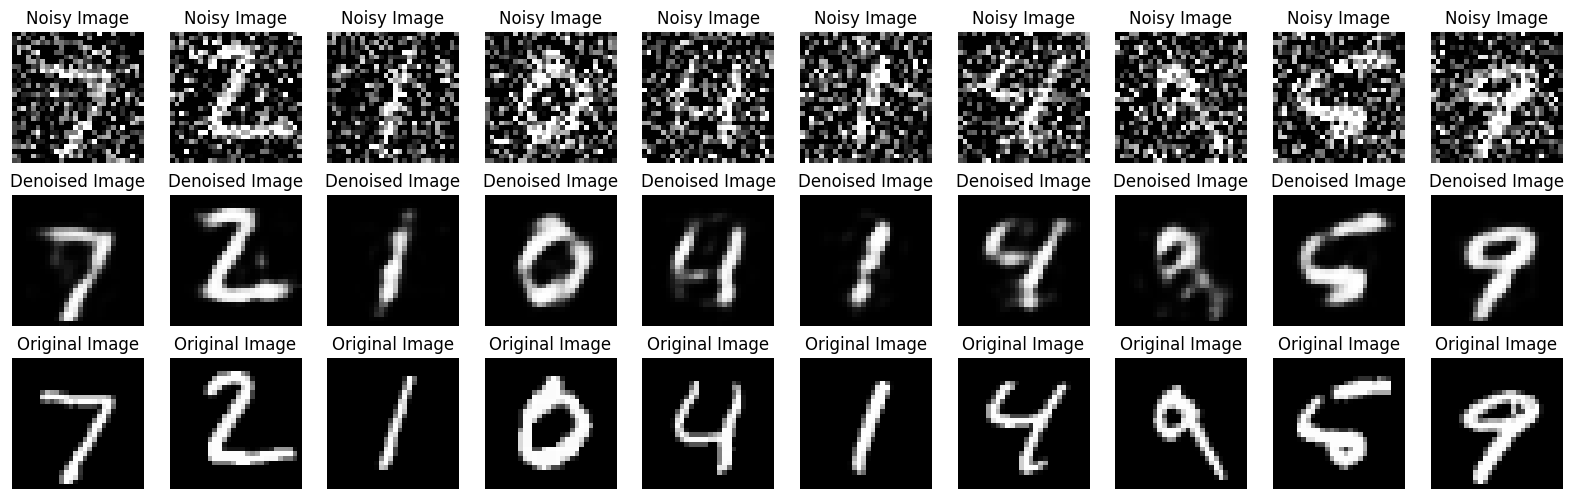

In [8]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model
import matplotlib.pyplot as plt

# Load MNIST dataset
(x_train, _), (x_test, _) = tf.keras.datasets.mnist.load_data()
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

# Add noise to the images
noise_factor = 0.5
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape)
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape)

# Clip the values to be in the valid range [0, 1]
x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

# Parameters
input_dim = 784  # 28x28 images flattened
encoding_dim = 64  # Size of encoding

# Input layer
input_img = Input(shape=(input_dim,))

# Encoded representation
encoded = Dense(encoding_dim, activation='relu')(input_img)

# Decoded representation
decoded = Dense(input_dim, activation='sigmoid')(encoded)

# Autoencoder model
autoencoder = Model(input_img, decoded)

# Compile model
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

# Train autoencoder
autoencoder.fit(x_train_noisy, x_train,
                epochs=50,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test_noisy, x_test))

# Make predictions
denoised_imgs = autoencoder.predict(x_test_noisy)

# Plotting original, noisy, and denoised images
n = 10  # Number of images to display
plt.figure(figsize=(20, 6))
for i in range(n):
    # Display noisy image
    ax = plt.subplot(3, n, i + 1)
    plt.imshow(x_test_noisy[i].reshape(28, 28), cmap='gray')
    plt.title("Noisy Image")
    plt.axis("off")

    # Display denoised image
    ax = plt.subplot(3, n, i + 1 + n)
    plt.imshow(denoised_imgs[i].reshape(28, 28), cmap='gray')
    plt.title("Denoised Image")
    plt.axis("off")

    # Display original image
    ax = plt.subplot(3, n, i + 1 + 2*n)
    plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
    plt.title("Original Image")
    plt.axis("off")

plt.show()


# 12**
#### Implement object detection using Transfer learning on food dataset

In [ ]:
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define paths
train_dir = r"D:\STUDY\I2IT\BE\Academic\DL\Practical\Dataset\food_dataset\training"
test_dir = r"D:\STUDY\I2IT\BE\Academic\DL\Practical\Dataset\food_dataset\evaluation"

# Parameters
img_size = (224, 224)  # Input size for the model
batch_size = 32

# Data generators
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical'
)

# Load the pre-trained model (SSD MobileNet)
base_model = tf.keras.applications.MobileNetV2(input_shape=(224, 224, 3), include_top=False)
base_model.trainable = False  # Freeze the base model

# Add new layers
model = tf.keras.Sequential([
    base_model,
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dense(len(train_generator.class_indices), activation='softmax')  # Number of classes
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.fit(train_generator, epochs=20, validation_data=test_generator)

test_loss, test_accuracy = model.evaluate(test_generator)
print(f'Test accuracy: {test_accuracy * 100:.2f}%')

import cv2
import numpy as np
import matplotlib.pyplot as plt

# Function to load and preprocess the image
def load_and_preprocess_image(image_path):
    img = cv2.imread(image_path)
    img = cv2.resize(img, img_size)
    img = img / 255.0  # Rescale
    return np.expand_dims(img, axis=0)

# Load and predict
test_image_path = r"D:\STUDY\I2IT\BE\Academic\DL\Practical\Dataset\food_dataset\friedtest.jpg"  # Replace with your image path
image = load_and_preprocess_image(test_image_path)

# Make predictions
predictions = model.predict(image)
predicted_class = np.argmax(predictions, axis=1)

# Display the image and prediction
plt.imshow(cv2.cvtColor(cv2.imread(test_image_path), cv2.COLOR_BGR2RGB))
plt.title(f'Predicted: {list(train_generator.class_indices.keys())[predicted_class[0]]}')
plt.axis('off')
plt.show()


# 13**
#### Implement image classification using transfer learning on animal dataset

# 14
#### Implement the Continuous Bag of Words (CBOW) Model.

In [10]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import nltk

# Download NLTK data files (if not already downloaded)
nltk.download('punkt')
nltk.download('stopwords')

# Sample corpus
corpus = [
    "The quick brown fox jumps over the lazy dog",
    "I love programming in Python",
    "Natural language processing is fascinating",
    "Word embeddings are useful in many NLP tasks",
    "CBOW is a great way to train word vectors"
]

# Preprocessing
stop_words = set(stopwords.words('english'))
tokenized_corpus = []
for sentence in corpus:
    tokens = word_tokenize(sentence.lower())
    filtered_tokens = [w for w in tokens if w.isalpha() and w not in stop_words]
    tokenized_corpus.append(filtered_tokens)

# Create a tokenizer
tokenizer = Tokenizer()
tokenizer.fit_on_texts(tokenized_corpus)
total_words = len(tokenizer.word_index) + 1  # Plus one for padding

# Create CBOW dataset
def create_cbow_dataset(corpus, window_size):
    context_words = []
    target_words = []

    for tokens in corpus:
        for i, target in enumerate(tokens):
            start = max(0, i - window_size)
            end = min(len(tokens), i + window_size + 1)
            context = [tokens[j] for j in range(start, end) if j != i]
            target_words.append(target)
            context_words.append(context)

    return context_words, target_words

# Set window size
window_size = 2
context, target = create_cbow_dataset(tokenized_corpus, window_size)

# Convert context and target words to sequences
context_sequences = tokenizer.texts_to_sequences([' '.join(c) for c in context])
target_sequences = tokenizer.texts_to_sequences(target)

# Pad the context sequences
max_length = max(len(seq) for seq in context_sequences)  # Find the maximum length
X = pad_sequences(context_sequences, maxlen=max_length, padding='post')
y = np.array(target_sequences).flatten()

# Convert target sequences to one-hot encoding
y = tf.keras.utils.to_categorical(y, num_classes=total_words)

# Build the CBOW model
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=total_words, output_dim=64, input_length=X.shape[1]),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(total_words, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X, y, epochs=100, verbose=1)

# Example context to test
test_context = "the brown fox".split()
test_sequence = tokenizer.texts_to_sequences([' '.join(test_context)])

# Pad the test sequence
test_sequence = pad_sequences(test_sequence, maxlen=max_length, padding='post')

# Make predictions
predicted = model.predict(test_sequence)
predicted_word_index = np.argmax(predicted, axis=1)

# Display the predicted word
predicted_word = tokenizer.index_word[predicted_word_index[0]]
print(f"Predicted Word for context '{' '.join(test_context)}': {predicted_word}")



Epoch 1/100


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.0800 - loss: 3.2183
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.2000 - loss: 3.2134
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.2400 - loss: 3.2088
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.2000 - loss: 3.2046
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.2400 - loss: 3.2005
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - accuracy: 0.2000 - loss: 3.1966
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.2000 - loss: 3.1927
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.2800 - loss: 3.1887
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - accuracy: 0.2800 - loss: 3.1847
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.2800 - loss: 3.1805
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.2800 - loss: 3.1763
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.3200 - loss: 3.1720
Epo

14.2

Deep learning (also known as deep structured learning) is part of a broader family of machine learning methods based on artificial neural networks with representation learning. Learning can be supervised, semi-supervised or unsupervised. Deep-learning architectures such as deep neural networks, deep belief networks, deep reinforcement learning, recurrent neural networks, convolutional neural networks and Transformers have been applied to fields including computer vision, speech recognition, natural language processing, machine translation, bioinformatics, drug design, medical image analysis, climate science, material inspection and board game programs, where they have produced results comparable to and in some cases surpassing human expert performance.
['Deep learning (also known as deep structured learning) is part of a broader family of machine learning methods based on artificial neural networks with representation learning', ' Learning can be supervised, semi-supervised or unsuperv

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.0000e+00 - loss: 4.3178
Epoch 2/80
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.0945 - loss: 4.3113 
Epoch 3/80
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.0518 - loss: 4.3046 
Epoch 4/80
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.0714 - loss: 4.2950 
Epoch 5/80
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.0479 - loss: 4.2844 
Epoch 6/80
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.0675 - loss: 4.2617 
Epoch 7/80
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.0479 - loss: 4.2501 
Epoch 8/80
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.0558 - loss: 4.2100 
Epoch 9/80
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.0636 - loss: 4.1613 
Epoch 10/80
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.0362 - loss: 4.1449     
Epoch 11/80
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.0479 - loss: 4.0699 
Epoch 12/80
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.0401 - loss: 3.9986     


'Deep learning (also known as deep structured learning) is part of a broader family of machine learning methods based on artificial neural networks with representation learning. Learning can be supervised, semi-supervised or unsupervised. Deep-learning architectures such as deep neural networks, deep belief networks, deep reinforcement learning, recurrent neural networks, convolutional neural networks and Transformers have been applied to fields including computer vision, speech recognition, natural language processing, machine translation, bioinformatics, drug design, medical image analysis, climate science, material inspection and board game programs, where they have produced results comparable to and in some cases surpassing human expert performance.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step
pred  ['known', 'as', 'structured', 'learning'] 
= deep 


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
pred  ['transformers', 'have', 'applied', 'to'] 
= been 


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
pred

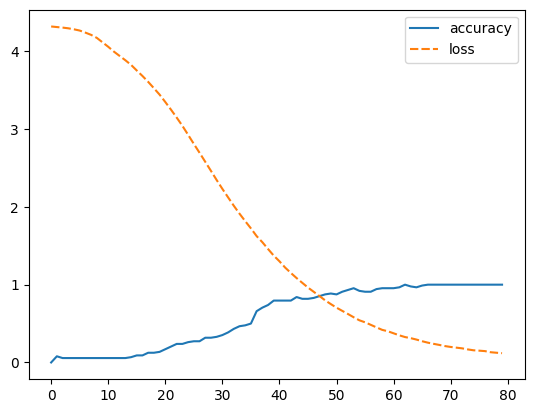

In [13]:
import numpy as np
import re

data = """Deep learning (also known as deep structured learning) is part of a broader family of machine learning methods based on artificial neural networks with representation learning. Learning can be supervised, semi-supervised or unsupervised. Deep-learning architectures such as deep neural networks, deep belief networks, deep reinforcement learning, recurrent neural networks, convolutional neural networks and Transformers have been applied to fields including computer vision, speech recognition, natural language processing, machine translation, bioinformatics, drug design, medical image analysis, climate science, material inspection and board game programs, where they have produced results comparable to and in some cases surpassing human expert performance."""
print(data)

sentences = data.split('.')
print(sentences)

clean_sent=[]
for sentence in sentences:
    if sentence=="":
        continue
    sentence = re.sub('[^A-Za-z0-9]+', ' ', (sentence))
    sentence = re.sub(r'(?:^| )\w (?:$| )', ' ', (sentence)).strip()
    sentence = sentence.lower()
    clean_sent.append(sentence)

print(clean_sent)

from tensorflow.keras.preprocessing.text import Tokenizer
tokenizer = Tokenizer()
tokenizer.fit_on_texts(clean_sent)
sequences = tokenizer.texts_to_sequences(clean_sent)
print(sequences)

index_to_word = {}
word_to_index = {}

for i, sequence in enumerate(sequences):
#     print(sequence)
    word_in_sentence = clean_sent[i].split()
#     print(word_in_sentence)

    for j, value in enumerate(sequence):
        index_to_word[value] = word_in_sentence[j]
        word_to_index[word_in_sentence[j]] = value

print(index_to_word, "\n")
print(word_to_index)

vocab_size = len(tokenizer.word_index) + 1
emb_size = 10
context_size = 2

contexts = []
targets = []

for sequence in sequences:
    for i in range(context_size, len(sequence) - context_size):
        target = sequence[i]
        context = [sequence[i - 2], sequence[i - 1], sequence[i + 1], sequence[i + 2]]
#         print(context)
        contexts.append(context)
        targets.append(target)
print(contexts, "\n")
print(targets)

#printing features with target
for i in range(5):
    words = []
    target = index_to_word.get(targets[i])
    for j in contexts[i]:
        words.append(index_to_word.get(j))
    print(words," -> ", target)

# Convert the contexts and targets to numpy arrays
X = np.array(contexts)
Y = np.array(targets)

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, Lambda

model = Sequential([
    Embedding(input_dim=vocab_size, output_dim=emb_size, input_length=2*context_size),
    Lambda(lambda x: tf.reduce_mean(x, axis=1)),
    Dense(256, activation='relu'),
    Dense(512, activation='relu'),
    Dense(vocab_size, activation='softmax')
])

model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(X, Y, epochs=80)

import seaborn as sns
sns.lineplot(model.history.history)

from sklearn.decomposition import PCA

embeddings = model.get_weights()[0]

pca = PCA(n_components=2)
reduced_embeddings = pca.fit_transform(embeddings)

print("'Deep learning (also known as deep structured learning) is part of a broader family of machine learning methods based on artificial neural networks with representation learning. Learning can be supervised, semi-supervised or unsupervised. Deep-learning architectures such as deep neural networks, deep belief networks, deep reinforcement learning, recurrent neural networks, convolutional neural networks and Transformers have been applied to fields including computer vision, speech recognition, natural language processing, machine translation, bioinformatics, drug design, medical image analysis, climate science, material inspection and board game programs, where they have produced results comparable to and in some cases surpassing human expert performance.")

# test model: select some sentences from above paragraph
test_sentenses = [
    "known as structured learning",
    "transformers have applied to",
    "where they produced results",
    "cases surpassing expert performance"
]

for sent in test_sentenses:
    test_words = sent.split(" ")
#     print(test_words)
    x_test =[]
    for i in test_words:
        x_test.append(word_to_index.get(i))
    x_test = np.array([x_test])
#     print(x_test)

    pred = model.predict(x_test)
    pred = np.argmax(pred[0])
    print("pred ", test_words, "\n=", index_to_word.get(pred),"\n\n")